<a href="https://colab.research.google.com/github/yashv04/Scouting/blob/main/Pinch_Hitters_in_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Best pinch hitters inside PP in the IPL so far (min of 20 ings)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max.colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
deliveries = pd.read_csv('deliveries_updated_mens_ipl.csv')

In [ ]:
def balls_per_dismissal(balls, dismissals):
  if dismissals > 0:
    return balls/dismissals
  else:
    return balls/1

def balls_per_boundary(balls, boundaries):
  if boundaries > 0:
    return balls/boundaries
  else:
    return balls/1

def playerStatistics(df):
      df['isDot']= df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
      df['isOne']= df['batsman_runs'].apply(lambda x: 1 if x==1 else 0)
      df['isTwo']= df['batsman_runs'].apply(lambda x: 1 if x==2 else 0)
      df['isThree']= df['batsman_runs'].apply(lambda x: 1 if x==3 else 0)
      df['isFour']= df['batsman_runs'].apply(lambda x: 1 if x==4 else 0)
      df['isSix']= df['batsman_runs'].apply(lambda x: 1 if x==6 else 0)

      runs = pd.DataFrame(df.groupby(['batsman', 'matchId'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
      innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
      balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
      dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})


      dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
      ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
      twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
      threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
      fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
      sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

      df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')

      df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
      df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)
      df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
      df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

      return df

In [ ]:
df = playerStatistics(deliveries)

In [ ]:
df.head()

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Badoni,11,161,139,9,57,53,11,0,11,7,115.827338,14.636364,15.444444,7.722222
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
4,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000


In [ ]:
def phase(over):
  if over <= 6:
    return 'Powerplay'
  elif over <= 15:
    return 'Middle'
  else:
    return 'Death'

In [ ]:
deliveries['phase']= deliveries['over'].apply(lambda x: phase(x))

In [ ]:
def phaseOfplay(df, current_phase):
  df = df[df['phase'] == current_phase]
  df.reset_index(drop=True, inplace=True)

  df['isDot']= df['batsman_runs'].apply(lambda x: 1 if x==0 else 0)
  df['isOne']= df['batsman_runs'].apply(lambda x: 1 if x==1 else 0)
  df['isTwo']= df['batsman_runs'].apply(lambda x: 1 if x==2 else 0)
  df['isThree']= df['batsman_runs'].apply(lambda x: 1 if x==3 else 0)
  df['isFour']= df['batsman_runs'].apply(lambda x: 1 if x==4 else 0)
  df['isSix']= df['batsman_runs'].apply(lambda x: 1 if x==6 else 0)

  runs = pd.DataFrame(df.groupby(['batsman', 'matchId'])['batsman_runs'].sum().reset_index()).groupby(['batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'runs'})
  innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
  balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'balls'})
  dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'dismissals'})


  dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
  ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
  twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
  threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
  fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
  sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})

  df = pd.merge(innings, runs, on = 'batsman').merge(balls, on = 'batsman').merge(dismissals, on = 'batsman').merge(dots, on = 'batsman').merge(ones, on = 'batsman').merge(twos, on = 'batsman').merge(threes, on = 'batsman').merge(fours, on = 'batsman').merge(sixes, on = 'batsman')

  df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis = 1)
  df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis = 1)
  df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['balls'], x['dismissals']), axis = 1)
  df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis = 1)

  return df

In [ ]:
pp_df = phaseOfplay(deliveries, 'Powerplay')

In [ ]:
pp_df.head(5)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,0,1,0,71.428571,5.0,7.0,7.00
1,A Badoni,2,2,9,1,7,2,0,0,0,0,22.222222,1.0,9.0,9.00
2,A Chopra,5,29,45,2,28,13,0,0,4,0,64.444444,5.8,22.5,11.25
3,A Flintoff,1,15,16,0,11,2,0,1,1,1,93.750000,15.0,16.0,8.00
4,A Manohar,2,13,14,1,7,5,0,0,2,0,92.857143,6.5,14.0,7.00


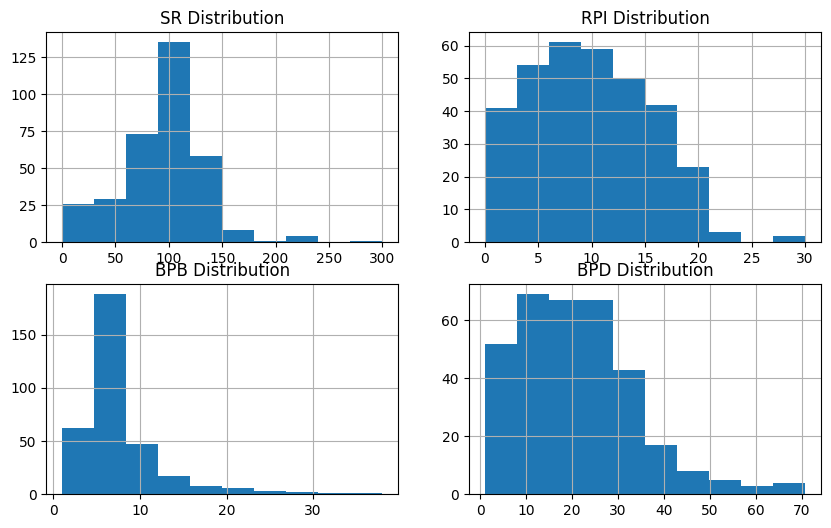

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(221)
pp_df.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
pp_df.RPI.hist()
plt.title('RPI Distribution')

plt.subplot(223)
pp_df.BPB.hist()
plt.title('BPB Distribution')

plt.subplot(224)
pp_df.BPD.hist()
plt.title('BPD Distribution')

plt.show()

In [ ]:
import seaborn as sns

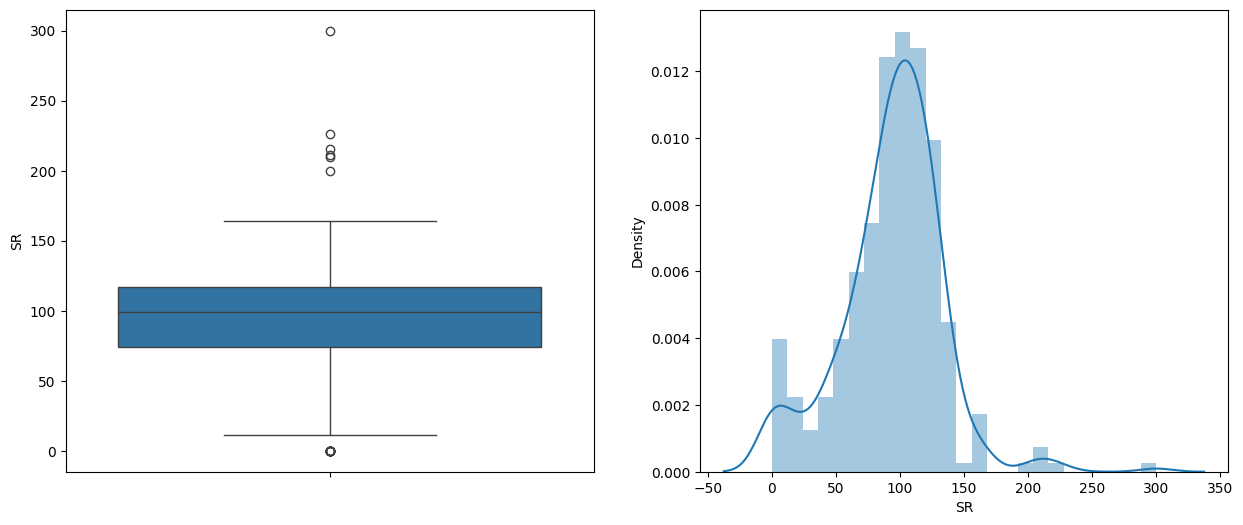

In [ ]:
plt.figure(figsize = (15, 6))

plt.subplot(121)
sns.boxplot(pp_df['SR'])

plt.subplot(122)
sns.distplot(pp_df['SR'])

plt.show()

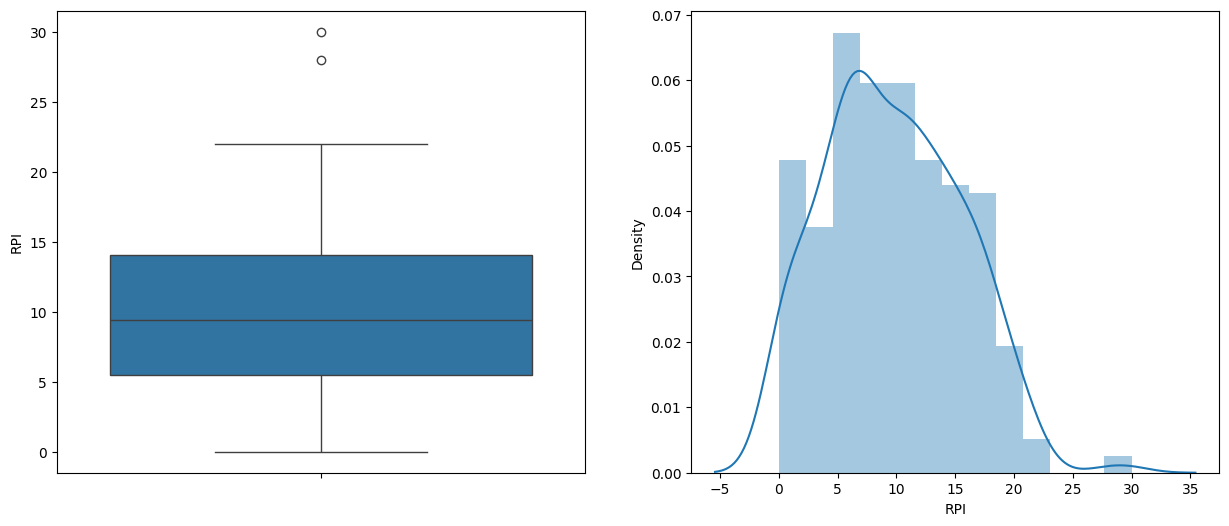

In [ ]:
plt.figure(figsize = (15, 6))

plt.subplot(121)
sns.boxplot(pp_df['RPI'])

plt.subplot(122)
sns.distplot(pp_df['RPI'])

plt.show()

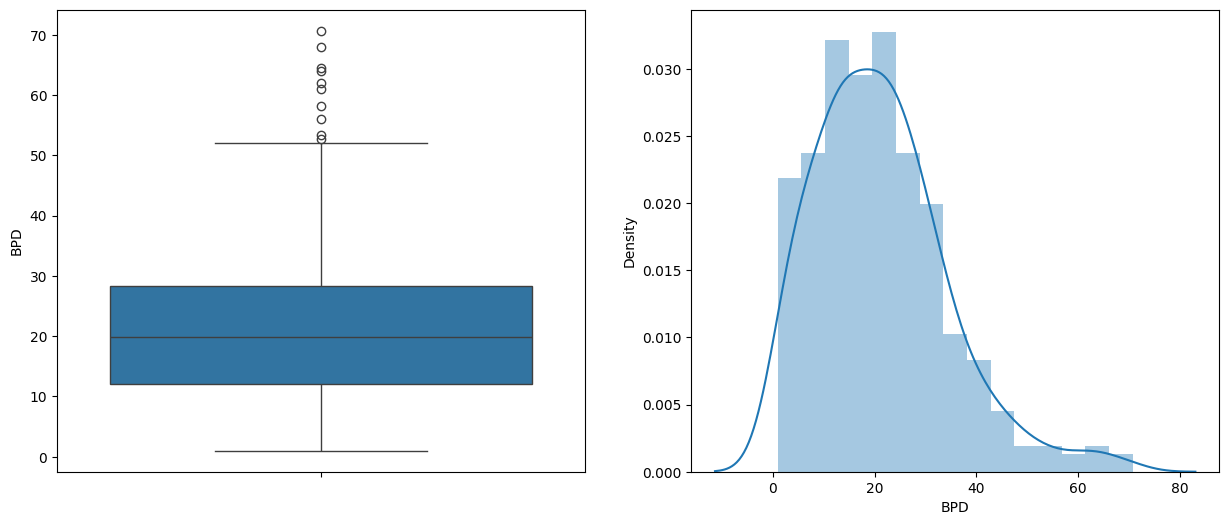

In [ ]:
plt.figure(figsize = (15, 6))

plt.subplot(121)
sns.boxplot(pp_df['BPD'])

plt.subplot(122)
sns.distplot(pp_df['BPD'])

plt.show()

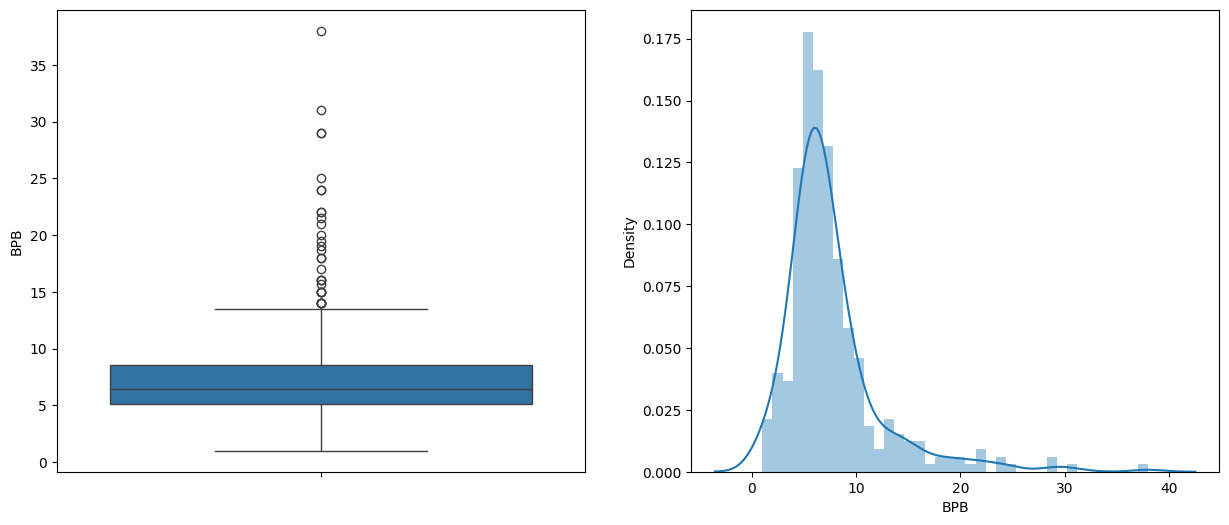

In [ ]:
plt.figure(figsize = (15, 6))

plt.subplot(121)
sns.boxplot(pp_df['BPB'])

plt.subplot(122)
sns.distplot(pp_df['BPB'])

plt.show()

In [ ]:
wt_sr, wt_rpi, wt_bpd, wt_bpb = 0.5, 0.07, 0.10, 0.27

In [ ]:
pp_df = pp_df[pp_df.innings > 20]
pp_df.reset_index(drop=True, inplace=True)

In [ ]:
pp_df['calc_SR'] = pp_df['SR'].apply(lambda x: x*x)
pp_df['calc_RPI'] = pp_df['RPI'].apply(lambda x: x*x)
pp_df['calc_BPD'] = pp_df['BPD'].apply(lambda x: x*x)
pp_df['calc_BPB'] = pp_df['BPB'].apply(lambda x: x*x)


sq_sr, sq_rpi, sq_bpd, sq_bpb = np.sqrt(pp_df[['calc_SR', 'calc_RPI', 'calc_BPD', 'calc_BPB']].sum())

pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x/sq_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x/sq_rpi)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x/sq_bpd)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x/sq_bpb)


pp_df['calc_SR'] = pp_df['calc_SR'].apply(lambda x: x*wt_sr)
pp_df['calc_RPI'] = pp_df['calc_RPI'].apply(lambda x: x*wt_rpi)
pp_df['calc_BPD'] = pp_df['calc_BPD'].apply(lambda x: x*wt_bpd)
pp_df['calc_BPB'] = pp_df['calc_BPB'].apply(lambda x: x*wt_bpb)

best_sr, worst_sr = max(pp_df['calc_SR']), min(pp_df['calc_SR'])
best_rpi, worst_rpi = max(pp_df['calc_RPI']), min(pp_df['calc_RPI'])
best_bpd, worst_bpd = max(pp_df['calc_BPD']), min(pp_df['calc_BPD'])
best_bpb, worst_bpb = max(pp_df['calc_BPB']), min(pp_df['calc_BPB'])


pp_df['dev_best_sr'] = pp_df['calc_SR'].apply(lambda x: (x - best_sr)*(x - best_sr))
pp_df['dev_best_rpi'] = pp_df['calc_RPI'].apply(lambda x: (x - best_rpi)*(x - best_rpi))
pp_df['dev_best_bpd'] = pp_df['calc_BPD'].apply(lambda x: (x - best_bpd)*(x - best_bpd))

pp_df['dev_best_bpb'] = pp_df['calc_BPB'].apply(lambda x: (x - best_bpb)*(x - best_bpb))

# Calculate 'dev_best_sqrt' after creating the necessary columns
pp_df['dev_best_sqrt'] = pp_df['dev_best_sr'] + pp_df['dev_best_rpi'] + pp_df['dev_best_bpd'] + pp_df['dev_best_bpb']

pp_df['dev_worst_sr'] = pp_df['calc_SR'].apply(lambda x: (x - worst_sr)*(x - worst_sr))
pp_df['dev_worst_rpi'] = pp_df['calc_RPI'].apply(lambda x: (x - worst_rpi)*(x - worst_rpi))
pp_df['dev_worst_bpd'] = pp_df['calc_BPD'].apply(lambda x: (x - worst_bpd)*(x - worst_bpd))
pp_df['dev_worst_bpb'] = pp_df['calc_BPB'].apply(lambda x: (x - worst_bpb)*(x - worst_bpb))

# Calculate 'dev_worst_sqrt' after creating the necessary columns
pp_df['dev_worst_sqrt'] = pp_df['dev_worst_sr'] + pp_df['dev_worst_rpi'] + pp_df['dev_worst_bpd'] + pp_df['dev_worst_bpb']

In [ ]:
pp_df['score'] = pp_df.apply(lambda x: x['dev_worst_sqrt'] / (x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis=1)

In [ ]:
pp_df[['batsman', 'score']].head()

,batsman,score
0,AB de Villiers,0.265302
1,AC Gilchrist,0.489975
2,AJ Finch,0.184715
3,AM Rahane,0.176594
4,AT Rayudu,0.089567


In [ ]:
pp_df[['batsman', 'runs', 'balls', 'dismissals', 'dots', 'ones', 'twos', 'threes', 'fours', 'sixes', 'SR', 'RPI', 'BPD', 'BPB', 'score']].sort_values(by='score', ascending=False).head(10)

,batsman,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,RPI,BPD,BPB,score
67,SP Narine,688,419,36,208,70,13,1,86,40,164.200477,16.380952,11.638889,3.325397,0.972628
7,CA Lynn,875,623,19,298,161,16,0,103,45,140.449438,21.875000,32.789474,4.209459,0.776016
27,JM Bairstow,747,537,19,248,141,22,4,91,31,139.106145,20.750000,28.263158,4.401639,0.747463
83,YK Pathan,473,340,15,159,89,16,0,52,24,139.117647,9.854167,22.666667,4.473684,0.743367
53,PP Shaw,1192,857,42,370,245,44,3,160,35,139.089848,18.920635,20.404762,4.394872,0.742067
79,V Sehwag,1785,1284,69,583,331,65,2,250,53,139.018692,17.330097,18.608696,4.237624,0.739599
24,JC Buttler,1361,997,29,478,250,41,2,166,59,136.509529,21.951613,34.379310,4.431111,0.700363
56,RA Tripathi,883,650,26,279,197,36,2,104,32,135.846154,16.980769,25.000000,4.779412,0.679544
16,E Lewis,432,320,14,155,82,11,2,49,21,135.000000,19.636364,22.857143,4.571429,0.660423
82,YBK Jaiswal,406,302,14,144,78,10,2,53,15,134.437086,17.652174,21.571429,4.441176,0.647441


#IPL Powerplay Pinch Hitters: Data-Driven Picks.
# The powerplay (overs 1-6) is crucial in T20 cricket, demanding aggressive batsmen who can score quickly. Data analysis has identified five standout pinch hitters in the IPL.

# IPL data, encompassing strike rate (SR), runs per innings (RPI), balls per dismissal (BPD), and balls per boundary (BPB), was analyzed to identify the most effective powerplay batsmen.

# Five batsmen consistently emerged as the top powerplay performers:

#1. SP Narine: Explosive batting style, consistently high strike rate.           
#2. JC Buttler: Powerplay specialist, combining aggression and consistency.

#3. YBK Jaiswal: Fearless approach, impressive strike rate.

#4. SA Yadav: Versatile, scoring boundaries and rotating the strike.

#5. F du Plessis: Experienced, steady hand, finding gaps effectively.
#These batsmen exhibit:
#High strike rates, enabling quick scoring.
#Notable runs per innings, reflecting impactful contributions.
#Balanced approach, shown by BPD and BPB metrics.
# Conclusion: These five are reliable powerplay pinch hitters in the IPL, possessing the ideal qualities to maximize scoring opportunities and give their teams an early edge. Watch for their powerplay exploits in the upcoming season!



